# Supplemental Information:

> **"Clonal heterogeneity influences the fate of new adaptive mutations"**

> Ignacio Vázquez-García, Francisco Salinas, Jing Li, Andrej Fischer, Benjamin Barré, Johan Hallin, Anders Bergström, Elisa Alonso-Pérez, Jonas Warringer, Ville Mustonen, Gianni Liti

## Figure 2 (+ Supp. Figs.)

This IPython notebook is provided for reproduction of Figures 2 and S2 of the paper. It can be viewed by copying its URL to nbviewer and it can be run by opening it in binder.

In [5]:
# Load external dependencies
from setup import *
# Load internal dependencies
import colors,config,plot,utils

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data import

### Chromosome coordinates

In [6]:
chr_coords = utils.chr_coords()

chr_coords.head()

,chr_arabic,chr_length,chr_roman,chr_start,chr_end
0,1,230218,I,0,230218
1,2,813184,II,230218,1043402
2,3,316620,III,1043402,1360022
3,4,1531933,IV,1360022,2891955
4,5,576874,V,2891955,3468829


In [7]:
# load data
freq_df = utils.load_data(dir_data+'seq/background/seq_background_freq.pickle')
# freq_df = pd.read_csv(dir_data+'seq/background/seq_background_freq.csv', encoding='utf-8', keep_default_na=False)

freq_df.head()

AttributeError: 'module' object has no attribute 'FrozenNDArray'

In [8]:
# load data
seq_qtl_df = utils.load_data(dir_data+'seq/background/seq_background_qtl_llh.pickle')
# seq_qtl_df = pd.read_csv(dir_data+'seq/background/seq_background_qtl_llh.csv', encoding='utf-8', keep_default_na=False)

seq_qtl_df.head()

AttributeError: 'module' object has no attribute 'FrozenNDArray'

In [9]:
# load data
seq_scores_df = utils.load_data(dir_data+'seq/background/seq_background_qtl_scores.pickle')
# seq_scores_df = pd.read_csv(dir_data+'seq/background/seq_background_qtl_scores.csv', encoding='utf-8', keep_default_na=False)

seq_scores_df.head()

AttributeError: 'module' object has no attribute 'FrozenNDArray'

In [6]:
# load data
seq_mut_df = utils.load_data(dir_data+'seq/de-novo/seq_de_novo_snps_indels.pickle')
# seq_mut_df = pd.read_csv(dir_data+'seq/de-novo/seq_de_novo_snps_indels.csv', encoding='utf-8', keep_default_na=False)

seq_mut_df = seq_mut_df.rename(columns={'chrom':'chr_arabic', 'pos':'site'})
seq_mut_df['chr_roman'] = seq_mut_df['chr_arabic'].apply(utils.int_to_roman)
seq_mut_df = utils.chr_to_gw(seq_mut_df, chr_coords)

seq_mut_df = seq_mut_df[seq_mut_df.mutation_type=='driver']

# remap genotypes
seq_mut_df['genotype'] = seq_mut_df['genotype'].map({'0/0': 0, '0/1': 1, '1/0': 1, '1/1': 2})

seq_mut_df['type'] = 'de novo'

seq_mut_df = pd.pivot_table(
    seq_mut_df, 
    index=['selection','population'], 
    columns=['chr_arabic','chr_roman','pos','gene']
)['frequency']

seq_mut_df.head()

NameError: name 'pd' is not defined

## Figure 2 - Genome-wide allele frequency changes

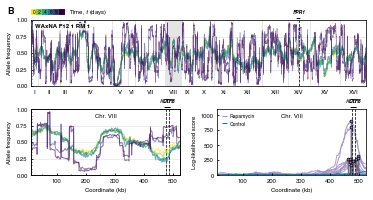

In [7]:
fig = plt.figure(figsize=(6, 5))

grid = gridspec.GridSpec(3, 1, height_ratios=[1.5,1,1], hspace=0.3)

gs = {}
gs['RM'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1])
gs['RM_zoom'] = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[2], wspace=0.25)

### genome-wide allele frequency changes (top panel) ###
e = 'RM'
p = 'WAxNA_F12_1_RM_1'
    
ax1 = plt.subplot(gs[e][0])
ax1.text(-0.0525, 1.2, 'B', transform=ax1.transAxes,
         fontsize=9, fontweight='bold', va='top', ha='right')

pdf = freq_df.ix[(e,p)].T

colors = [config.time['color'][k] for k in pdf.columns.get_level_values('time')]
pdf.reset_index().plot(
    ax=ax1, kind='line',
    x='pos', y=[0,2,4,8,16,32],
    color=colors, alpha=0.6, lw=0.45, 
    legend=False, rasterized=False, zorder=3
)
    
ax1.set_xlabel('')
ax1.set_ylabel('Allele frequency')

ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax1.yaxis.set_minor_locator(ticker.MaxNLocator(nbins=20))
ax1.yaxis.set_ticks_position('left')
    
# grid
xlabels = chr_coords.chr_start + (chr_coords.chr_end - chr_coords.chr_start)/2.
xstart = chr_coords.chr_start
ax1.set_xticks(xlabels)
ax1.set_xticklabels(chr_coords.chr_roman)
xgrid=[xst+1. for xst in list(set(xstart))]
[ax1.axvline(g, lw=1, ls="-", color="0.9") for g in xgrid] # vertical lines
ax1.yaxis.grid(lw=0.75, ls="-", color="0.9") # horizontal lines
    
# # shades
# for start, end in zip(chr_coords.chr_start, chr_coords.chr_end):
#     for chrom, g in chr_coords.groupby('chr_arabic'):
#         ax1.axvspan(g.chr_start.squeeze(), g.chr_end.squeeze(),
#                     color=('0.9' if chrom % 2 == 0 else 'w'), lw=0, zorder=0) 
    
ax1.annotate(p.replace('_',' '),
             xy=(0.025, 0.9), xycoords=ax1.transAxes, fontsize=6, weight='bold',
             color='k', ha='left', va='center',
             xytext=(-5,0), textcoords='offset points', 
             bbox=(dict(facecolor='white', edgecolor='none', 
                        alpha=0.75, boxstyle='round,pad=.2', rasterized=False)))
    
ax1.tick_params(axis='x', which='major', size=0, labelsize=6)
ax1.tick_params(axis='y', which='major', size=2, labelsize=6)
ax1.tick_params(axis='both', which='minor', size=1, labelsize=4)

ax1.set_ylim(0, 1)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax1.yaxis.set_minor_locator(ticker.MaxNLocator(nbins=20))
ax1.yaxis.set_ticks_position('left')
    
# show de novo mutations
sdn = seq_mut_df.ix[e,p].dropna(how='all')
    
labels = sdn.index.get_level_values('gene')
loc = zip(sdn.index.get_level_values('pos'), [1.025]*len(sdn))
    
for gene, (x, y) in zip(labels, loc):
    ax1.axvline(x=x, c='k', ls="--", lw=.75, zorder=2)
    ann = ax1.annotate(gene, xy=(x, y), xycoords=('data', 'axes fraction'), 
                       xytext=(0, 4), textcoords='offset points',
                       arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                       fontsize=5, style='italic', weight='bold',
                       annotation_clip=False, va='bottom', ha='center')

# legend
cax = inset_axes(
    ax1, width='10%', height='10%', loc=3,
    bbox_to_anchor=(0, 1.075, 1, 1), bbox_transform=ax1.transAxes, borderpad=0
)
mappable = plot.colorbar_index(ncolors=6, cmap=plt.cm.viridis_r) 
cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.get_xaxis().set_ticks([])
for j, lab in enumerate([0, 2, 4, 8, 16, 32]):
    cbar.ax.text((j + .5)/ 6.0, .5, lab, ha='center', va='center', fontsize=5)
cbar.ax.yaxis.set_label_position("right")
cbar.ax.set_ylabel('Time, $t$ (days)', fontsize=5, rotation=0, ha='left', va='center')            
cbar.outline.set_visible(False)
        
### zoomed inset (bottom left panel) ###
ax2 = plt.subplot(gs['RM_zoom'][0])
ax2_zoom = ax2.twiny()

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
xmin = chr_coords[chr_coords.chr_arabic==8].chr_start.squeeze()
xmax = chr_coords[chr_coords.chr_arabic==8].chr_end.squeeze()

ax2_zoom.set_xlim(xmin, xmax)
ax2_zoom.set_xticks([])
ax2_zoom.set_xticklabels([])

plot.zoom_effect(ax1, ax2_zoom, xmin, xmax, edgecolor='none', facecolor='gray', rasterized=False)#, edgewidth=5)

freq = freq_df.loc[(e,p),8].T

colors = [config.time['color'][k] for k in freq.columns.get_level_values('time')]
freq.reset_index().plot(
    ax=ax2, kind='line',
    x='site', y=[0,2,4,8,16,32],
    color=colors, alpha=0.6, lw=1,
    legend=False, rasterized=False
)

ax2.set_xlabel('Coordinate (kb)')
ax2.set_ylabel('Allele frequency')

ax2.set_ylim(0, 1)
ax2.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax2.xaxis.set_minor_locator(ticker.MaxNLocator(nbins=12))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax2.yaxis.set_minor_locator(ticker.MaxNLocator(nbins=20))
ax2.yaxis.set_ticks_position('left')

ax2.yaxis.grid(lw=0.75, ls="-", color="0.9") # horizontal lines

xticks = ax2.get_xticks()/1E3
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks.astype(int))

ax2.annotate('Chr. VIII',
             xy=(0.5, 0.9), xycoords=ax2.transAxes, fontsize=6,
             color='k', ha='center', va='center')

### log-likelihood scores (bottom right panel) ###
ax3 = plt.subplot(gs['RM_zoom'][1], sharex=ax2)

# slice chr. VIII at 30 kb resolution
llh = seq_qtl_df.loc[8,30]
colors = [config.selection['color'][e] for e in llh.columns.get_level_values('selection')]
llh.reset_index().plot(
    ax=ax3, kind='line',
    x='site', y=['RM','YPD'],
    color=colors, alpha=0.8, lw=1,
    legend=False, rasterized=False, zorder=0
)

scores = seq_scores_df[30]['RM'].dropna()
markerline, stemlines, baseline = ax3.stem(scores.index.get_level_values('site'), scores.values)
plt.setp(markerline, 'color', config.selection['color']['RM'],
         markersize = 2.75, markeredgewidth=.75, markeredgecolor='k', zorder=3)
plt.setp(stemlines, linewidth=.75, color=config.selection['color']['RM'],
         path_effects=[PathEffects.withStroke(linewidth=1.25, foreground="k")], zorder=2)  
plt.setp(baseline, 'color', 'none', zorder=1)

ax3.set_xlabel('Coordinate (kb)')
ax3.set_ylabel('Log-likelihood score')

# axes limits
ax3.set_ylim(0, 1.1E3)
ax3.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax3.xaxis.set_minor_locator(ticker.MaxNLocator(nbins=12))
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax3.yaxis.set_ticks_position('left')

# annotation in chromosome coordinates
annotation = {
    'CTF8': {
        'chr': 8,
        'start': 486230,
        'end': 486631
    },
    'KOG1': {
        'chr': 8,
        'start': 475999,
        'end': 480672       
    }
}

RM_artist = lines.Line2D((0,1),(0,0), color=config.selection['color']['RM'], linewidth=1)
YPD_artist = lines.Line2D((0,1),(0,0), color=config.selection['color']['YPD'], linewidth=1)

leg3 = ax3.legend([RM_artist,YPD_artist],
                  ['Rapamycin','Control'], ncol=1,
                  frameon=False, loc='upper left',
                  borderaxespad=0.5, handlelength=1, 
                  prop={'size': 5})
plt.setp(leg3.get_title(), fontsize=6)

ax3.annotate('Chr. VIII',
             xy=(0.5, 0.9), xycoords=ax3.transAxes, fontsize=6,
             color='k', ha='center', va='center')

for ax in [ax2,ax3]:
    
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    
    for gene in annotation:
        x = annotation[gene]['start'] + (annotation[gene]['end'] - annotation[gene]['start'])/2
        y = 1.025
        ax.axvline(x=x, c='k', ls="--", lw=.75, zorder=1)
        ann = ax.annotate(gene, xy=(x, y), xycoords=('data', 'axes fraction'), 
                          xytext=(0, 4), textcoords='offset points',
                          arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                          fontsize=5, style='italic', weight=('bold' if gene=='CTF8' else 'normal'),
                          annotation_clip=False, va='bottom', ha='center')

for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    
    for sp in ax.spines.values():
        sp.set(color='k', linewidth=0.75, linestyle='-')

plot.save_figure(dir_paper+'figures/figure2/figure2')
plt.show()

**Fig. 2:** Study overview and genome-wide allele frequency changes. (**A**) Schematic diagram of the divergence, crossing and selection phases of the experiment. Two diverged parental lines of *S. cerevisiae* were crossed for twelve rounds, generating a large ancestral population of unique haplotypes. These diploid cells were asexually evolved for 32 days in stress and control environments and the resulting adaptation was studied by whole-population and isolate sequencing and phenotyping. Populations evolved resistant macroscopic subclones driven by beneficial *de novo* mutations and individuals whose parental allele configurations, i.e. genetic backgrounds, provided a resistance phenotype. (**B**) Genome-wide allele frequency  of pre-existing parental variants as observed for a representative population in rapamycin (WAxNA F12 1 RM 1). Bottom left: Zoomed inset of the shaded region shows allele frequency changes in chromosome VIII during selection in rapamycin. Early time points 2, 4 and 8 show localized allele frequency changes at 460-490 kb due to a beneficial NA allele sweeping with hitchhiking passengers. Late time points 16 and 32 show abrupt jumps between successive loci that reflect the parental haplotype of the emerging subclone(s). These long-range correlations can alter the frequency of parental alleles independently of their fitness value. In case of a fully clonal population, the allele frequencies would be at 0, 0.5 and 1.0 corresponding to the background loci genotypes NA/NA, WA/NA, and WA/WA of a diploid clone that reached fixation. Bottom right: We tested a model where each allele is proposed to be a driver under selection thus changing in frequency and causing movement in nearby linked passenger alleles. Top log-likelihood scores are shown for all populations in this region of interest (Methods). We validated the *CTF8* NA allele to be strongly beneficial for rapamycin resistance (Fig. S8).

## Figure S2 - Study overview and genome-wide allele frequency changes

In [15]:
panels = {
    'HU': {
        'WAxNA_F12_1_HU_1':0, 
        'WAxNA_F12_1_HU_2':1, 
        'WAxNA_F12_1_HU_3':2, 
        'WAxNA_F12_2_HU_1':3, 
        'WAxNA_F12_2_HU_2':4,
        'WAxNA_F12_2_HU_3':5
        },
    'RM': {
        'WAxNA_F2_1_RM_1':0,
        'WAxNA_F2_1_RM_2':1,
        'WAxNA_F12_1_RM_1':2, 
        'WAxNA_F12_1_RM_2':3, 
        'WAxNA_F12_1_RM_3':4, 
        'WAxNA_F12_1_RM_4':5,
        'WAxNA_F12_2_RM_1':6, 
        'WAxNA_F12_2_RM_2':7, 
        'WAxNA_F12_2_RM_3':8, 
        'WAxNA_F12_2_RM_4':9   
    },
    'YPD': {
        'WAxNA_F2_1_YPD_1':0,
        'WAxNA_F12_1_YPD_1':1, 
        'WAxNA_F12_1_YPD_2':2, 
        'WAxNA_F12_2_YPD_1':3, 
        'WAxNA_F12_2_YPD_2':4
    }
}

freq_df = freq_df.ix[['HU','RM','YPD']]

shape = pd.DataFrame({k: 
x.shape for k,x in freq_df.unstack('time').groupby(level=['selection'])
})

ygrid = shape.loc[0,['HU','RM','YPD']].values

gs = {}

for ii, (e, sdf) in enumerate(freq_df.groupby(level='selection')):
    
    nrows = len(sdf.index.get_level_values('sample').unique())
    ncols = 2
            
    height, width = np.array([nrows, ncols*4], dtype=float)
    
    fig = plt.figure(figsize=(width, height))
    
    fig.subplots_adjust(left=0.07,bottom=0.01,right=0.85,top=0.99)
    
    gs[e] = gridspec.GridSpec(nrows, ncols, width_ratios=[6, 1], hspace=0.2, wspace=0.05)

    for (jj, (p, data)) in enumerate(sdf.groupby(level='sample')):
        
        if jj==0:
            # Retrieve axes
            ax1 = plt.subplot(gs[e][panels[e][p],0])
            ax2 = plt.subplot(gs[e][panels[e][p],1])
        else:
            ax1 = plt.subplot(gs[e][panels[e][p],0], sharex=ax1)
            ax2 = plt.subplot(gs[e][panels[e][p],1], sharex=ax2)
        
        data = freq_df.ix[(e,p)].T
        times = data.columns.get_level_values('time')
        colors = [config.time['color'][k] for k in times]
        alpha = (0.6 if e in ['HU','RM'] else 0.9)
        
        plot.gw_frequency(
            data.reset_index(), ax1, 
            x='pos', y=times,
            color=colors, 
            alpha=alpha
        )
        plot.histogram_frequency(
            data, ax2, 
            alpha=alpha
        )
        
        if (e,p) in [('HU','WAxNA_F12_2_HU_3'),('RM','WAxNA_F12_2_RM_4'),('YPD','WAxNA_F12_2_YPD_2')]:
            ax1.set_xlabel('Chromosome')
            ax2.set_xlabel('Allele frequency')
        if (e,p) in [('HU','WAxNA_F12_1_HU_3'),('RM','WAxNA_F12_1_RM_3'),('YPD','WAxNA_F12_1_YPD_2')]:
            xy = {'HU':(-.06, -.15),'RM':(-.06, -.15),'YPD':(-.06, .5)}
            ax1.annotate(
                'Allele frequency', xy=xy[e], xycoords=ax1.transAxes,
                color='k', fontsize=6, ha='right', va='center', rotation=90,
                xytext=(0, 0), textcoords='offset points'
            )
            xy = {'HU':(1.4, -.15),'RM':(1.4, -.15),'YPD':(1.4, .5)}
            ax2.annotate(
                'Density', xy=xy[e], xycoords=ax2.transAxes,
                color='k', fontsize=6, ha='right', va='center', rotation=270,
                xytext=(0, 0), textcoords='offset points'
            )
            
        # Set panel labels
        if ax1.is_first_row():
            ax1.text(-0.05, 1.3, chr(ii + ord('A')), transform=ax1.transAxes,
                     fontsize=9, fontweight='bold', va='center', ha='right')
            ax1.text(0, 1.3, 'Selection: %s' % config.selection['long_label'][e], 
                     transform=ax1.transAxes, fontsize=8, va='center', ha='left')

        # Grid
        xlabels=chr_coords.chr_start + (chr_coords.chr_end - chr_coords.chr_start)/2.
        xgrid=[xst+1. for xst in list(set(chr_coords.chr_start))]
        
        # Labels
        if ax1.is_last_row():
            ax1.set_xticks(xlabels)
            ax1.set_xticklabels(chr_coords.chr_roman)
    
        ax1.annotate(
            p.replace('_',' '),
            xy=(0.025, 0.9), xycoords=ax1.transAxes, fontsize=6,
            color='k', weight='bold', ha='left', va='center',
            xytext=(-5,0), textcoords='offset points', 
            bbox=(dict(facecolor='white', edgecolor='none', alpha=0.75, boxstyle='round,pad=.2'))
        )
        
        # Legend
        if ax1.is_first_row():
            cax = inset_axes(
                ax2, width='80%', height='10%', loc=8,
                bbox_to_anchor=(0.1, 1.1, 0.8, 1), bbox_transform=ax2.transAxes, borderpad=0
            )
            mappable = plot.colorbar_index(ncolors=6, cmap=plt.cm.viridis_r) 
            cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
            cbar.ax.get_xaxis().set_ticks([])
            for jj, label in enumerate(times):
                cbar.ax.text((jj + .5)/ 6.0, .5, label, ha='center', va='center', fontsize=5)
            cbar.ax.set_title('Time, $t$ (days)', fontsize=5, ha='center', va='center')            
            cbar.outline.set_visible(False)
                    
        # Show de novo mutations
        if (e,p) in seq_mut_df.index:
        
            data = seq_mut_df.ix[e,p].dropna(how='all')
                
            labels = data.index.get_level_values('gene')
            loc = zip(data.index.get_level_values('pos'), [1.01]*len(data))
    
            for gene, (x,y) in zip(labels, loc):
                ax1.axvline(x=x, c='k', ls="--", lw=.75, zorder=3)
                ann = ax1.annotate(
                    gene, xy=(x,y), xycoords=('data', 'axes fraction'), 
                    xytext=(0, 4), textcoords='offset points',
                    arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                    fontsize=5, style='italic', weight='bold',
                    va='bottom', ha='center'
                )

    ax1.tick_params(axis='x', which='major', size=0, labelsize=6)
    ax2.tick_params(axis='x', which='major', size=2, labelsize=6)
    
    for ax in fig.get_axes():
        # Axis label size
        ax.xaxis.label.set_size(6)
        ax.yaxis.label.set_size(6)
        # Tick properties
        ax.tick_params(axis='y', which='major', size=2, labelsize=6)
        ax.tick_params(axis='x', which='minor', size=0, labelsize=4)
        ax.tick_params(axis='y', which='minor', size=0, labelsize=4)

    plot.save_figure(dir_supp+'figures/supp_figure_seq_allele_freqs/supp_figure_seq_allele_freqs_%s' % e)
    plt.show()

NameError: name 'pd' is not defined

**Fig. S2:** Time series of genome-wide frequencies, $x_i^\text{WA}$, of the WA allele after ${t\,{=}\,\text{(0, 2, 4, 8, 16, 32)}}$ days, measured by whole-population sequencing. From top to bottom, replicate populations were evolved in (**A**) hydroxyurea, (**B**) rapamycin and (**C**) a control environment. Allele frequencies are estimated from the mean posterior probability given by the filterHD algorithm. Left: Chromosomes are ordered along the $x$-axis; allele frequencies of 52,466 background variants are shown on the $y$-axis, colored by time point. Driver mutations are highlighted by arrows. Right: Changes in the allele frequency spectrum across time.